# Importing packages

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [138]:
df08 = pd.read_excel('C:/Users/Admin/Desktop/Datasets/Udacity Data Analyst/Case Study 2 - Fuel Economy/all_alpha_08.xls')
df18 = pd.read_excel('C:/Users/Admin/Desktop/Datasets/Udacity Data Analyst/Case Study 2 - Fuel Economy/all_alpha_18.xlsx')

In [139]:
df08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [140]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2713 non-null   object 
 1   Displ                 2663 non-null   float64
 2   Cyl                   2663 non-null   float64
 3   Trans                 2713 non-null   object 
 4   Drive                 2713 non-null   object 
 5   Fuel                  2713 non-null   object 
 6   Cert Region           2713 non-null   object 
 7   Stnd                  2713 non-null   object 
 8   Stnd Description      2713 non-null   object 
 9   Underhood ID          2713 non-null   object 
 10  Veh Class             2713 non-null   object 
 11  Air Pollution Score   2713 non-null   int64  
 12  City MPG              2713 non-null   object 
 13  Hwy MPG               2713 non-null   object 
 14  Cmb MPG               2713 non-null   object 
 15  Greenhouse Gas Score 

# Cleaning Column Labels

In [141]:
# view 2008 dataset
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [142]:
# view 2018 dataset
df18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309


### Drop Extraneous Columns

In [143]:
# drop columns from 2008 dataset
df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [144]:
# drop columns from 2018 dataset
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1, inplace = True)# confirm changes


### Rename Columns

In [145]:
# rename Sales Area to Cert Region
df08.rename(columns = {'Sales Area': 'Cert Region'}, inplace = True)

# confirm changes
df08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [146]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [147]:
# replace spaces with underscores and lowercase labels for 2018 dataset

df18.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)
# confirm changes
df18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


In [148]:
# confirm column labels for 2008 and 2018 datasets are identical
df08.columns == df18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [149]:
# make sure they're all identical like this
(df08.columns == df18.columns).all()

True

# Filter, Drop Nulls, Drop duplicates

In [150]:
# view dimensions of dataset
df08.shape

(2404, 14)

In [151]:
# view dimensions of dataset
df18.shape

(2713, 14)

## Filter by Certification Region

In [152]:
# filter datasets for rows following California standards
df08 = df08.query('cert_region == "CA"')

df18 = df18.query('cert_region == "CA"')

In [153]:
# confirm only certification region is California
df08['cert_region'].unique()

array(['CA'], dtype=object)

In [154]:
# confirm only certification region is California
df18['cert_region'].unique()

array(['CA'], dtype=object)

In [155]:
# drop certification region columns form both datasets
df08.drop('cert_region', axis = 1, inplace = True)


In [156]:
df08.shape

(1084, 13)

In [157]:
df18.shape

(1341, 14)

## Drop Rows with Missing Values

In [158]:
# drop rows with any null values in both datasets
df08.dropna(axis = 'index', inplace = True)
df18.dropna(axis = 'index', inplace = True)

In [159]:
# checks if any of columns in 2008 have null values - should print False
df08.isnull().sum().any()

False

In [160]:
# checks if any of columns in 2018 have null values - should print False
df18.isnull().sum().any()

False

## Dedupe Data

In [161]:
# print number of duplicates in 2008 and 2018 datasets
print('The number of duplicated values in 2008 dataset is:', df08.duplicated().sum())
print('The number of duplicated values in 2018 dataset is:', df18.duplicated().sum())

The number of duplicated values in 2008 dataset is: 23
The number of duplicated values in 2018 dataset is: 10


In [162]:
# drop duplicates in both datasets
df08.drop_duplicates(inplace = True)
df18.drop_duplicates(inplace = True)


In [163]:
# print number of duplicates again to confirm dedupe - should both be 0

df08.duplicated().sum()
df08.duplicated().sum()

0

# Fixing data types isses in `cyl` column 
- 2008: Extracting int from string
- 2018: Converting float to int


In [164]:
# check value counts for the 2008 cyl column
df08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [165]:
# Extract int from strings in the 2008 cyl column
df08['cyl'] = df08['cyl'].str.extract(r'(\d)').astype('int')

In [166]:
# Check value counts for 2008 cyl column again to confirm the change
df08['cyl'].value_counts()

6    409
4    283
8    199
5     48
1     45
2      2
Name: cyl, dtype: int64

In [167]:
# convert 2018 cyl column to int
df18['cyl'] = df18['cyl'].astype('int')

# Fixing data types of `air_pollution_score` column
- 2008: Converting string to float
- 2018: Converting int to float

In [168]:
# try using pandas' to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df08['air_pollution_score'].astype('float')

ValueError: could not convert string to float: '6/4'

# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [169]:
df08[df08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. 

In [170]:
# First, let's get all the hybrids in 2008
hb_08 = df08[df08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset only has one!

In [171]:
# hybrids in 2018
hb_18 = df18[df18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
59,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,CA,small car,7,34/81,39/86,36/83,10,Elite
175,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
227,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
229,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
259,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Ethanol/Gas,CA,standard SUV,5,9/13,13/17,10/14,1,No
2586,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Ethanol/Gas,CA,pickup,5,9/13,12/17,10/15,2,No
2679,VOLVO S90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,midsize car,7,26/70,33/72,29/71,10,Elite
2703,VOLVO XC60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small SUV,7,26/60,28/58,26/59,10,Elite


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [172]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [173]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [174]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [175]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [176]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [177]:
# drop the original hybrid rows
df08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df08 = df08.append(new_rows, ignore_index=True)

In [178]:
# check that all the original hybrid rows with "/"s are gone
df08[df08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [179]:
df08.shape

(987, 13)

# Repeat this process for the 2018 dataset

In [180]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [181]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    
    df2[c] = df2[c].apply(lambda x: x.split('/')[1]) 

In [182]:
# append the two dataframes
new_rows = df1.append(df2)


In [183]:
# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df18.drop(hb_18.index, inplace=True)

# append new_rows to df18
df18 = df18.append(new_rows)

In [184]:
# check that they're gone
df18[df18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [185]:
df18.shape

(1383, 14)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [186]:
# convert string to float for 2008 air pollution column
df08['air_pollution_score'] = df08['air_pollution_score'].astype('float')

In [187]:
# convert int to float for 2018 air pollution column
df18['air_pollution_score'] = df18['air_pollution_score'].astype('int')

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [188]:
df08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int32  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    object 
 9   hwy_mpg               987 non-null    object 
 10  cmb_mpg               987 non-null    object 
 11  greenhouse_gas_score  987 non-null    object 
 12  smartway              987 non-null    object 
dtypes: float64(2), int32(1), object(10)
memory usage: 96.5+ KB


In [189]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df18[c] = df18[c].astype('float')
    df08[c] = df08[c].astype('float')

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [190]:
# convert from float to int
df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype('int') 

## All the dataypes are now fixed! Take one last check to confirm all the changes.

In [191]:
df08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [192]:
df18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int32
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [193]:
df08.shape == df18.shape

False

# Quiz

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [194]:
df08['fuel'].value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [195]:
df18['fuel'].value_counts()

Gasoline       1229
Ethanol          41
Gas              41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

In [196]:
alt_08 = df08.query('fuel in ["CNG", "ethanol"]')['model'].nunique()
alt_08

2

In [197]:
alt_18 = df18.query('fuel in ["Electricity", "Ethanol"]')['model'].nunique()
alt_18

52

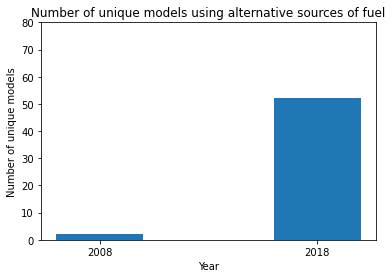

In [198]:
plt.bar(['2008', '2018'], [alt_08, alt_18], width = 0.4)
plt.title('Number of unique models using alternative sources of fuel')
plt.xlabel('Year')
plt.ylabel('Number of unique models')
plt.ylim(0, 80)
plt.show()

##### The number of unique models that use an alternative source of fuel since 2008 until 2018 is 24 models.

##   

### Q2: How much have vehicle classes improved in fuel economy?  

In [199]:
df08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [200]:
avg_08 = df08.groupby('veh_class')['cmb_mpg'].mean()

In [201]:
avg_18 = df18.groupby('veh_class')['cmb_mpg'].mean()

In [202]:
# The difference in fuel economy between 2008 and 2018
diff = avg_18 - avg_08
diff

veh_class
SUV                     NaN
large car          5.922416
midsize car        8.568275
minivan            8.049020
pickup             1.972892
small SUV               NaN
small car          4.568654
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

In [203]:
# Since there are several models that don't match in both datasets, 
# we will remove the NaN values
diff.dropna(inplace = True)

In [204]:
diff

veh_class
large car        5.922416
midsize car      8.568275
minivan          8.049020
pickup           1.972892
small car        4.568654
station wagon    7.687879
van              1.047619
Name: cmb_mpg, dtype: float64

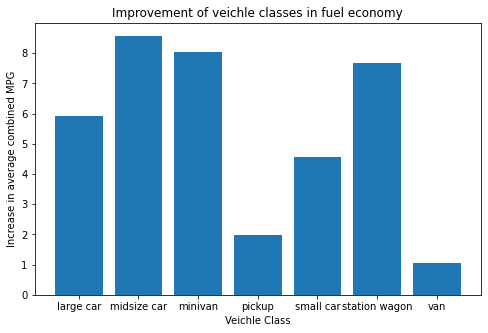

In [205]:
plt.figure(figsize = (8,5))
plt.bar(diff.index, diff)
plt.title('Improvement of veichle classes in fuel economy')
plt.xlabel('Veichle Class')
plt.ylabel('Increase in average combined MPG')
plt.show()

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (cmb_mpg & greenhouse_gas_score)

In [206]:
df08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [207]:
print(df08['smartway'].unique())
print(df18['smartway'].unique())

['no' 'yes']
['No' 'Yes' 'Elite']


In [208]:
smart_08 = df08.query('smartway == "yes"')
smart_18 = df18.query('smartway in ["Yes", "Elite"]')
smart_18

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
65,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,CA,small car,3,27.0,37.0,31.0,7,Yes
170,BMW 328d,2.0,4,SemiAuto-8,2WD,Diesel,CA,small car,3,31.0,43.0,36.0,7,Yes
369,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,27.0,33.0,30.0,7,Yes
498,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,CA,small car,6,27.0,40.0,32.0,7,Yes
500,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,CA,small car,6,29.0,40.0,33.0,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,PORSCHE Panamera Turbo S e-Hybrid ST,4.0,8,AMS-8,4WD,Electricity,CA,large car,3,48.0,51.0,49.0,7,Yes
2542,TOYOTA Prius Prime,1.8,4,CVT,2WD,Electricity,CA,midsize car,7,145.0,121.0,133.0,10,Elite
2679,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,CA,midsize car,7,70.0,72.0,71.0,10,Elite
2703,VOLVO XC60,2.0,4,SemiAuto-8,4WD,Electricity,CA,small SUV,7,60.0,58.0,59.0,10,Elite


In [209]:
smart_08_green_mean = smart_08.describe()['greenhouse_gas_score']['mean']
smart_08_cmb_mean = smart_08.describe()['cmb_mpg']['mean']


print('The average greenhouse gas score for 2008 is', smart_08_green_mean)
print('The average combined MPG for 2008 is', smart_08_cmb_mean)

The average greenhouse gas score for 2008 is 6.868421052631579
The average combined MPG for 2008 is 23.736842105263158


In [210]:
smart_18_green_mean = smart_18.describe()['greenhouse_gas_score']['mean']
smart_18_cmb_mean = smart_18.describe()['cmb_mpg']['mean']


print('The average greenhouse gas score for 2018 is', smart_18_green_mean)
print('The average combined MPG for 2018 is', smart_18_cmb_mean)

The average greenhouse gas score for 2018 is 8.143518518518519
The average combined MPG for 2018 is 40.23148148148148


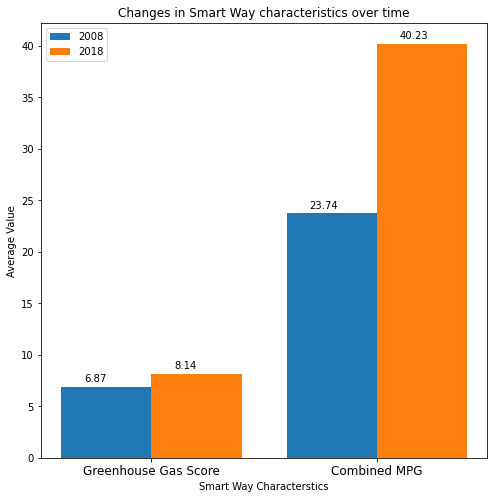

In [211]:
plt.figure(figsize = (8,8))
w = 0.4
bars = ['Greenhouse Gas Score', 'Combined MPG']
x_axis = np.arange(len(bars))
x_axis2 = [i+w for i in x_axis1]

y1 = [smart_08_green_mean, smart_08_cmb_mean]
y2 = [smart_18_green_mean, smart_18_cmb_mean]

plt.bar(x_axis, y1, w, label = '2008')
plt.bar(x_axis2, y2 , w, label = '2018')

for index, value in enumerate(y1):
    plt.text(index - 0.1, value + 0.5, str(value.round(2)))
    
for index, value in enumerate(y2):
    plt.text(index + 0.3, value + 0.5, str(value.round(2)))

plt.title('Changes in Smart Way characteristics over time')
plt.xlabel('Smart Way Characterstics')
plt.ylabel('Average Value')
plt.xticks(x_axis + (w/2), bars, fontsize = 12)
plt.legend()
plt.show()

### Q4: What features are associated with better fuel economy (mpg)?

In [212]:
# Selecting the veichles that have more than 50% fuel economy
top_08 = df08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [213]:
top_18 = df18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,1.985428,4.094718,4.934426,29.675774,36.641166,32.284153,6.526412
std,0.496196,0.635154,1.884260,15.196900,12.290901,13.816292,1.560733
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

##### We have to combine the two datasets but, first, we have to add "_2008" after each column name in 2008 dataset to distinguish them from 2018 columns.

In [214]:
# Renaming 2008 columns
df08.rename(columns = lambda x: x[:10] + '_2008', inplace = True)

In [215]:
df08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [216]:
# Merging datasets
df_combined = df08.merge(df18, left_on = 'model_2008', right_on = 'model')

In [217]:
# View to check merge
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_2008            1454 non-null   object 
 1   displ_2008            1454 non-null   float64
 2   cyl_2008              1454 non-null   int32  
 3   trans_2008            1454 non-null   object 
 4   drive_2008            1454 non-null   object 
 5   fuel_2008             1454 non-null   object 
 6   veh_class_2008        1454 non-null   object 
 7   air_pollut_2008       1454 non-null   float64
 8   city_mpg_2008         1454 non-null   float64
 9   hwy_mpg_2008          1454 non-null   float64
 10  cmb_mpg_2008          1454 non-null   float64
 11  greenhouse_2008       1454 non-null   int32  
 12  smartway_2008         1454 non-null   object 
 13  model                 1454 non-null   object 
 14  displ                 1454 non-null   float64
 15  cyl                  

In [218]:
# Creating a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [219]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA MDX,17.000000,23.000000
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667


In [220]:
# Creating a new column, `mpg_change`, with the change in mpg

model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [221]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA MDX,17.000000,23.000000,6.000000
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000


In [222]:
# Finding the vehicle that improved the most

change_max = model_mpg['mpg_change'].max()
change_max

10.666666666666668

In [223]:
model_mpg[model_mpg['mpg_change'] == change_max]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Malibu,22.333333,33.0,10.666667
